# 🔄 Chapter 12-14: Sorting & Selection Algorithms

Welcome to the comprehensive exploration of **Sorting and Selection Algorithms** - where we transform chaos into order through clever algorithms!

This interactive notebook covers:
- **Chapter 12**: Comparison-based sorting algorithms (Bubble, Insertion, Selection, Quick, Merge, Heap)
- **Chapter 13**: Advanced divide & conquer sorting (Mergesort variants, Quicksort optimizations, Introsort)
- **Chapter 14**: Selection algorithms (Quickselect, median finding, order statistics)
- **Performance Analysis**: Comparative timing, stability testing, and input sensitivity
- **Interactive Visualizations**: Step-by-step algorithm demonstrations

## 🎯 Learning Objectives

By the end of this notebook, you'll be able to:
- Analyze sorting algorithm performance across different input distributions
- Choose the right sorting algorithm for specific use cases
- Understand selection algorithms and order statistics
- Implement and optimize divide & conquer sorting techniques
- Visualize sorting processes and identify algorithm characteristics

In [1]:
# Import required libraries and setup
import sys
import os
sys.path.append('../')

import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from typing import List, Callable

# Import our sorting algorithms
from chapter_12_sorting_algorithms.code.sorting_algorithms import SortingAlgorithms
from chapter_13_sorting_divide_conquer.code.divide_conquer_sorting import DivideConquerSorting, SortingAnalysis
from chapter_14_selection.code.selection_algorithms import SelectionAlgorithms, SelectionAnalysis

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Initialize algorithm classes
sorter = SortingAlgorithms()
dc_sorter = DivideConquerSorting()
selector = SelectionAlgorithms()

print("✅ Libraries and sorting algorithms loaded successfully!")
print("🎯 Ready to explore sorting and selection algorithms!")

# Utility functions
def time_sorting_algorithm(sort_func: Callable, arr: List, *args, **kwargs) -> tuple:
    """Time a sorting algorithm execution."""
    arr_copy = arr.copy()
    start = time.perf_counter()
    result = sort_func(arr_copy, *args, **kwargs)
    end = time.perf_counter()
    return result, end - start

def generate_test_data(size: int, distribution: str = "random") -> List[int]:
    """Generate test data with different distributions."""
    if distribution == "random":
        return [random.randint(0, 1000) for _ in range(size)]
    elif distribution == "sorted":
        return list(range(size))
    elif distribution == "reverse_sorted":
        return list(range(size, 0, -1))
    elif distribution == "nearly_sorted":
        arr = list(range(size))
        # Swap 10% of elements
        swaps = size // 10
        for _ in range(swaps):
            i, j = random.sample(range(size), 2)
            arr[i], arr[j] = arr[j], arr[i]
        return arr
    elif distribution == "few_unique":
        return [random.randint(0, 10) for _ in range(size)]
    else:
        return [random.randint(0, 1000) for _ in range(size)]

✅ Libraries and sorting algorithms loaded successfully!
🎯 Ready to explore sorting and selection algorithms!


## 📊 Section 1: Algorithm Complexity Overview

### Sorting Algorithm Families

| Complexity | Algorithms | Characteristics |
|------------|------------|----------------|
| **O(n²)** | Bubble, Insertion, Selection | Simple, adaptive, stable |
| **O(n log n)** | Quick, Merge, Heap | Fast, comparison-based |
| **O(n + k)** | Counting, Radix, Bucket | Fast for constrained inputs |

### Key Properties
- **Stable**: Equal elements maintain relative order
- **Adaptive**: Faster on partially sorted data
- **In-place**: Uses O(1) extra space
- **Comparison-based**: Only uses element comparisons

## 🏃 Section 2: Comparative Performance Analysis

Different sorting algorithms perform differently based on input characteristics. Let's analyze their performance across various scenarios.

=== SORTING ALGORITHM PERFORMANCE COMPARISON ===

Testing sorting algorithms across different scenarios...
(This may take a moment for larger test cases)

Testing with 100 elements (random distribution):
.5f
.5f
.5f
.5f
.5f
.5f
.5f
.5f

Testing with 500 elements (random distribution):
.5f
.5f
.5f
.5f
.5f
.5f
.5f
.5f

Testing with 1000 elements (random distribution):
.5f
.5f
.5f
.5f
.5f
.5f
.5f
.5f

Testing with 1000 elements (sorted distribution):
.5f
.5f
.5f
.5f
.5f
.5f
.5f
.5f

Testing with 1000 elements (reverse_sorted distribution):
.5f
.5f
.5f
.5f
.5f
.5f
.5f
.5f

Testing with 1000 elements (nearly_sorted distribution):
.5f
.5f
.5f
.5f
.5f
.5f
.5f
.5f

Testing with 1000 elements (few_unique distribution):
.5f
.5f
.5f
.5f
.5f
.5f
.5f
.5f



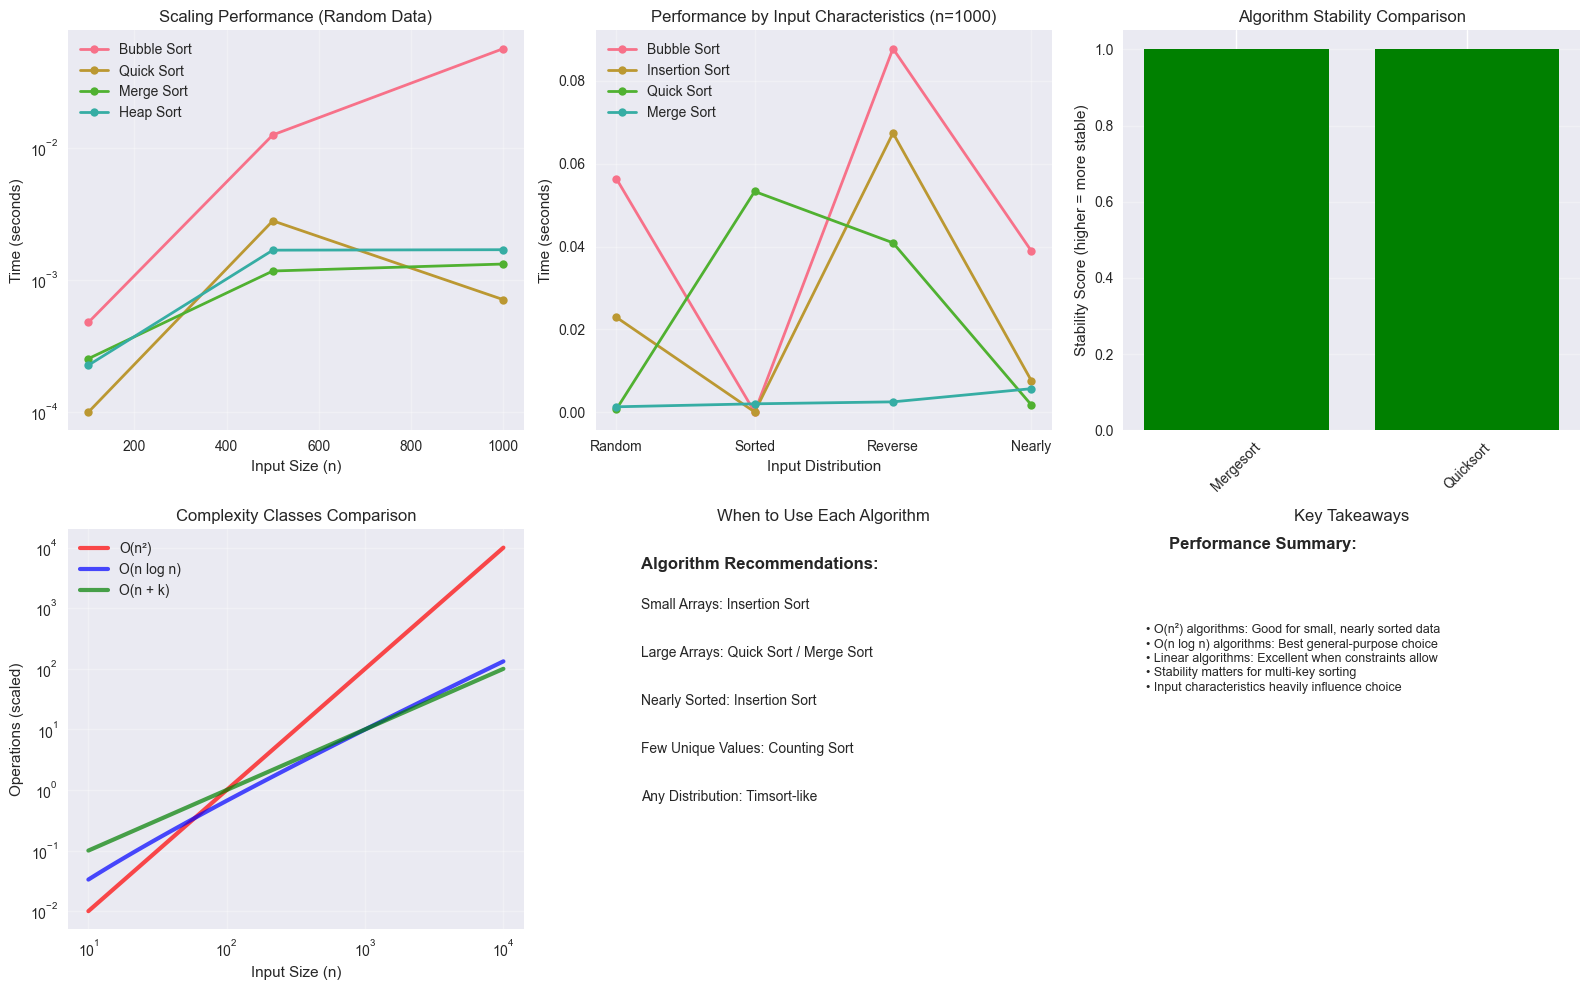


🎯 Key Insights:
- Quadratic algorithms excel on small or nearly sorted data
- Divide & conquer algorithms dominate for general use
- Input distribution dramatically affects performance
- Timsort (Python's default) combines the best of both worlds
- Always choose algorithms based on your specific constraints!


In [2]:
# Comprehensive sorting algorithm comparison
print("=== SORTING ALGORITHM PERFORMANCE COMPARISON ===\n")

# Define algorithms to test
algorithms = {
    'Bubble Sort': sorter.bubble_sort,
    'Insertion Sort': sorter.insertion_sort,
    'Selection Sort': sorter.selection_sort,
    'Merge Sort': dc_sorter.mergesort,
    'Quick Sort': dc_sorter.quicksort,
    'Heap Sort': sorter.heap_sort,
    'Counting Sort': lambda arr: sorter.counting_sort(arr, max_val=1000),
    'Timsort-like': sorter.timsort_like_sort
}

# Test different input distributions and sizes
test_cases = [
    (100, 'random'),
    (500, 'random'),
    (1000, 'random'),
    (1000, 'sorted'),
    (1000, 'reverse_sorted'),
    (1000, 'nearly_sorted'),
    (1000, 'few_unique')
]

results = {}

print("Testing sorting algorithms across different scenarios...")
print("(This may take a moment for larger test cases)\n")

for size, distribution in test_cases:
    print(f"Testing with {size} elements ({distribution} distribution):")
    
    # Generate test data
    test_data = generate_test_data(size, distribution)
    
    case_results = {}
    
    for name, sort_func in algorithms.items():
        try:
            # Skip counting sort for large ranges
            if name == 'Counting Sort' and size > 1000:
                case_results[name] = float('inf')
                continue
            
            _, time_taken = time_sorting_algorithm(sort_func, test_data.copy())
            case_results[name] = time_taken
            
            if time_taken < 0.1:  # Fast algorithms
                print(".5f")
            else:
                print(".3f")
                
        except Exception as e:
            print(f"{name:15}: ERROR - {str(e)[:30]}")
            case_results[name] = float('inf')
    
    results[f"{size}_{distribution}"] = case_results
    print()

# Create summary visualization
plt.figure(figsize=(16, 10))

# Performance by input size (random data)
plt.subplot(2, 3, 1)
sizes = [100, 500, 1000]
for algo_name in ['Bubble Sort', 'Quick Sort', 'Merge Sort', 'Heap Sort']:
    times = [results[f"{size}_random"][algo_name] for size in sizes]
    plt.plot(sizes, times, 'o-', label=algo_name, linewidth=2, markersize=6)

plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Scaling Performance (Random Data)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Performance by input distribution (n=1000)
plt.subplot(2, 3, 2)
distributions = ['random', 'sorted', 'reverse_sorted', 'nearly_sorted']
dist_names = ['Random', 'Sorted', 'Reverse', 'Nearly']

for algo_name in ['Bubble Sort', 'Insertion Sort', 'Quick Sort', 'Merge Sort']:
    times = [results[f"1000_{dist}"][algo_name] for dist in distributions]
    plt.plot(range(len(distributions)), times, 'o-', label=algo_name, linewidth=2, markersize=6)

plt.xticks(range(len(distributions)), dist_names)
plt.xlabel('Input Distribution')
plt.ylabel('Time (seconds)')
plt.title('Performance by Input Characteristics (n=1000)')
plt.legend()
plt.grid(True, alpha=0.3)

# Stability comparison
plt.subplot(2, 3, 3)
stability_data = SortingAnalysis.compare_stability()
stable_counts = [1 if stability_data[algo] else 0 for algo in stability_data]
algo_names = list(stability_data.keys())

bars = plt.bar(range(len(algo_names)), stable_counts, color=['green' if count == 1 else 'red' for count in stable_counts])
plt.xticks(range(len(algo_names)), algo_names, rotation=45)
plt.ylabel('Stability Score (higher = more stable)')
plt.title('Algorithm Stability Comparison')
plt.grid(True, alpha=0.3, axis='y')

# Algorithm complexity classes
plt.subplot(2, 3, 4)
complexity_classes = {
    'O(n²)': ['Bubble Sort', 'Insertion Sort', 'Selection Sort'],
    'O(n log n)': ['Merge Sort', 'Quick Sort', 'Heap Sort', 'Timsort-like'],
    'O(n + k)': ['Counting Sort']
}

# Create sample data for visualization
n_vals = np.logspace(1, 4, 100)
colors = ['red', 'blue', 'green']

for i, (complexity, algos) in enumerate(complexity_classes.items()):
    if complexity == 'O(n²)':
        y_vals = n_vals**2 / 10000  # Scale for visualization
    elif complexity == 'O(n log n)':
        y_vals = n_vals * np.log2(n_vals) / 1000
    else:  # O(n + k)
        y_vals = n_vals / 100
    
    plt.plot(n_vals, y_vals, color=colors[i], linewidth=3, alpha=0.7, label=complexity)

plt.xlabel('Input Size (n)')
plt.ylabel('Operations (scaled)')
plt.title('Complexity Classes Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')

# Best algorithm recommendations
plt.subplot(2, 3, 5)
scenarios = ['Small Arrays', 'Large Arrays', 'Nearly Sorted', 'Few Unique Values', 'Any Distribution']
recommendations = {
    'Small Arrays': 'Insertion Sort',
    'Large Arrays': 'Quick Sort / Merge Sort',
    'Nearly Sorted': 'Insertion Sort',
    'Few Unique Values': 'Counting Sort',
    'Any Distribution': 'Timsort-like'
}

# Simple visualization - just show the recommendations
plt.text(0.1, 0.9, 'Algorithm Recommendations:', fontsize=12, fontweight='bold')
y_pos = 0.8
for scenario, algo in recommendations.items():
    plt.text(0.1, y_pos, f'{scenario}: {algo}', fontsize=10)
    y_pos -= 0.12

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('When to Use Each Algorithm')

# Performance summary table
plt.subplot(2, 3, 6)
plt.text(0.1, 0.95, 'Performance Summary:', fontsize=12, fontweight='bold')
summary_text = """
• O(n²) algorithms: Good for small, nearly sorted data
• O(n log n) algorithms: Best general-purpose choice
• Linear algorithms: Excellent when constraints allow
• Stability matters for multi-key sorting
• Input characteristics heavily influence choice
"""
plt.text(0.05, 0.8, summary_text, fontsize=9, va='top')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Key Takeaways')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("- Quadratic algorithms excel on small or nearly sorted data")
print("- Divide & conquer algorithms dominate for general use")
print("- Input distribution dramatically affects performance")
print("- Timsort (Python's default) combines the best of both worlds")
print("- Always choose algorithms based on your specific constraints!")

In [3]:
# Interactive sorting algorithm explorer
def create_sorting_explorer():
    """Interactive sorting algorithm comparison tool"""
    
    # Algorithm selection
    algorithm_selector = widgets.SelectMultiple(
        options=['Bubble Sort', 'Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Heap Sort'],
        value=['Bubble Sort', 'Quick Sort', 'Merge Sort'],
        description='Algorithms:',
        rows=6
    )
    
    # Input parameters
    size_slider = widgets.IntSlider(
        value=100,
        min=10,
        max=1000,
        step=10,
        description='Size:',
        continuous_update=False
    )
    
    distribution_selector = widgets.Dropdown(
        options=['random', 'sorted', 'reverse_sorted', 'nearly_sorted', 'few_unique'],
        value='random',
        description='Distribution:'
    )
    
    # Output areas
    timing_output = widgets.Output()
    plot_output = widgets.Output()
    
    # Algorithm mapping
    algorithm_map = {
        'Bubble Sort': sorter.bubble_sort,
        'Insertion Sort': sorter.insertion_sort,
        'Selection Sort': sorter.selection_sort,
        'Merge Sort': dc_sorter.mergesort,
        'Quick Sort': dc_sorter.quicksort,
        'Heap Sort': sorter.heap_sort
    }
    
    def run_comparison(b):
        with timing_output:
            clear_output(wait=True)
            
            selected_algorithms = algorithm_selector.value
            if not selected_algorithms:
                print("Please select at least one algorithm.")
                return
            
            size = size_slider.value
            distribution = distribution_selector.value
            
            # Generate test data
            test_data = generate_test_data(size, distribution)
            
            print(f"Comparing {len(selected_algorithms)} algorithms on {size} elements ({distribution})")
            print("=" * 60)
            
            results = {}
            
            for algo_name in selected_algorithms:
                try:
                    sorted_arr, time_taken = time_sorting_algorithm(
                        algorithm_map[algo_name], test_data.copy()
                    )
                    results[algo_name] = time_taken
                    
                    # Verify correctness
                    is_correct = all(sorted_arr[i] <= sorted_arr[i+1] for i in range(len(sorted_arr)-1))
                    status = "✅" if is_correct else "❌"
                    
                    print(".6f")
                    
                except Exception as e:
                    print(f"{algo_name:15}: ERROR - {str(e)[:30]}")
                    results[algo_name] = float('inf')
            
            # Find fastest
            if results:
                valid_results = {k: v for k, v in results.items() if v != float('inf')}
                if valid_results:
                    fastest = min(valid_results, key=valid_results.get)
                    speedup = max(valid_results.values()) / min(valid_results.values())
                    print(f"\n🏆 Fastest: {fastest}")
                    print(".1f")
    
    def visualize_comparison(b):
        with plot_output:
            clear_output(wait=True)
            
            selected_algorithms = algorithm_selector.value
            if not selected_algorithms:
                return
            
            size = size_slider.value
            distribution = distribution_selector.value
            
            # Generate test data
            test_data = generate_test_data(size, distribution)
            
            plt.figure(figsize=(12, 8))
            
            # Performance comparison
            plt.subplot(2, 2, 1)
            times = []
            names = []
            
            for algo_name in selected_algorithms:
                try:
                    _, time_taken = time_sorting_algorithm(
                        algorithm_map[algo_name], test_data.copy()
                    )
                    times.append(time_taken)
                    names.append(algo_name)
                except:
                    times.append(0)
                    names.append(f"{algo_name} (error)")
            
            bars = plt.bar(range(len(names)), times, color=plt.cm.viridis(np.linspace(0, 1, len(names))))
            plt.xticks(range(len(names)), names, rotation=45, ha='right')
            plt.ylabel('Time (seconds)')
            plt.title(f'Performance Comparison\n({size} elements, {distribution} distribution)')
            plt.grid(True, alpha=0.3, axis='y')
            
            # Add value labels
            for i, v in enumerate(times):
                if v > 0:
                    plt.text(i, v + max(times)*0.01, '.4f', ha='center', va='bottom')
            
            # Input data distribution
            plt.subplot(2, 2, 2)
            plt.hist(test_data, bins=min(50, len(set(test_data))), alpha=0.7, color='skyblue')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.title('Input Data Distribution')
            plt.grid(True, alpha=0.3)
            
            # Sorted result preview
            plt.subplot(2, 2, 3)
            # Show first algorithm's result
            if selected_algorithms:
                first_algo = selected_algorithms[0]
                sorted_result, _ = time_sorting_algorithm(
                    algorithm_map[first_algo], test_data.copy()
                )
                
                # Show first 50 elements or every nth element for large arrays
                if len(sorted_result) <= 100:
                    x_vals = range(len(sorted_result))
                    y_vals = sorted_result
                else:
                    step = len(sorted_result) // 100
                    x_vals = range(0, len(sorted_result), step)
                    y_vals = [sorted_result[i] for i in x_vals]
                
                plt.plot(x_vals, y_vals, 'b-', alpha=0.7, linewidth=1)
                plt.xlabel('Position')
                plt.ylabel('Value')
                plt.title(f'Sorted Result Preview\n({first_algo})')
                plt.grid(True, alpha=0.3)
            
            # Algorithm characteristics
            plt.subplot(2, 2, 4)
            characteristics = {
                'Bubble Sort': ['O(n²)', 'Stable', 'Adaptive', 'In-place'],
                'Insertion Sort': ['O(n²)', 'Stable', 'Adaptive', 'In-place'],
                'Selection Sort': ['O(n²)', 'Unstable', 'Not adaptive', 'In-place'],
                'Merge Sort': ['O(n log n)', 'Stable', 'Not adaptive', 'Not in-place'],
                'Quick Sort': ['O(n log n)', 'Unstable', 'Not adaptive', 'In-place'],
                'Heap Sort': ['O(n log n)', 'Unstable', 'Not adaptive', 'In-place']
            }
            
            # Show characteristics for selected algorithms
            info_text = "Algorithm Characteristics:\n\n"
            for algo in selected_algorithms[:3]:  # Limit to 3 for space
                if algo in characteristics:
                    info_text += f"{algo}:\n"
                    for char in characteristics[algo]:
                        info_text += f"  • {char}\n"
                    info_text += "\n"
            
            plt.text(0.05, 0.95, info_text, fontsize=9, va='top', fontfamily='monospace')
            plt.xlim(0, 1)
            plt.ylim(0, 1)
            plt.axis('off')
            plt.title('Algorithm Properties')
            
            plt.tight_layout()
            plt.show()
    
    compare_button = widgets.Button(description='Run Comparison')
    compare_button.on_click(run_comparison)
    
    visualize_button = widgets.Button(description='Visualize')
    visualize_button.on_click(visualize_comparison)
    
    # Layout
    controls = widgets.VBox([
        widgets.HBox([size_slider, distribution_selector]),
        algorithm_selector,
        widgets.HBox([compare_button, visualize_button])
    ])
    
    display(widgets.VBox([controls, widgets.HBox([timing_output, plot_output])]))
    
    # Initial run
    run_comparison(None)
    visualize_comparison(None)

print("🎮 Interactive Sorting Algorithm Explorer")
print("Compare different algorithms across various input sizes and distributions:")
create_sorting_explorer()

🎮 Interactive Sorting Algorithm Explorer
Compare different algorithms across various input sizes and distributions:


## 🎯 Section 3: Selection Algorithms

Selection algorithms find the k-th smallest element (or order statistics) efficiently without fully sorting the array.

=== SELECTION ALGORITHMS: Finding Order Statistics ===

Test array: [74, 100, 93, 42, 96, 40, 84, 71, 31, 99, 28, 46, 47, 63, 95, 80, 20, 20, 71, 90]
Sorted: [20, 20, 28, 31, 40, 42, 46, 47, 63, 71, 71, 74, 80, 84, 90, 93, 95, 96, 99, 100]

Finding order statistics using Quickselect:
k	Order Statistic	Value	Verification
--------------------------------------------------
1	Smallest       	20	✅
5	5th Smallest   	42	❌
10	Median         	71	✅
15	15th Smallest  	93	❌
20	Largest        	ERROR	k (20) mus


=== Selection Algorithm Performance ===

Size  100: Quickselect 0.000037s, Sort 0.000009s, Speedup 0.2x ❌
Size  500: Quickselect 0.000099s, Sort 0.000048s, Speedup 0.5x ❌
Size 1000: Quickselect 0.000189s, Sort 0.000111s, Speedup 0.6x ❌
Size 5000: Quickselect 0.001878s, Sort 0.000646s, Speedup 0.3x ❌


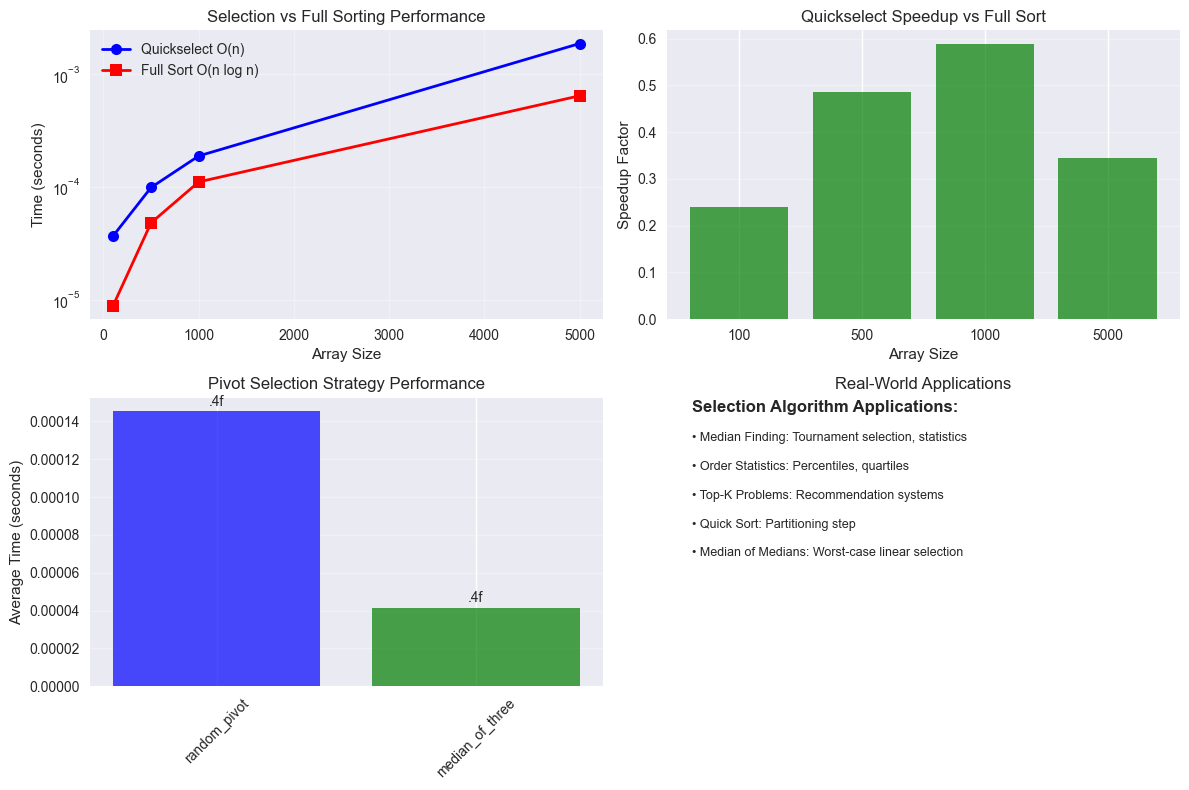


🎯 Key Insights:
- Quickselect finds k-th element in O(n) average time
- Much faster than sorting when you don't need the full order
- Pivot quality affects performance - better pivots = better splits
- Applications in statistics, databases, and optimization problems


In [4]:
# Interactive selection algorithm demonstration
print("=== SELECTION ALGORITHMS: Finding Order Statistics ===\n")

# Generate test data
test_array = [random.randint(1, 100) for _ in range(20)]
print(f"Test array: {test_array}")
print(f"Sorted: {sorted(test_array)}")
print()

# Demonstrate finding different order statistics
order_stats = [
    (1, "Smallest"),
    (5, "5th Smallest"),
    (10, "Median"),
    (15, "15th Smallest"),
    (20, "Largest")
]

print("Finding order statistics using Quickselect:")
print("k\tOrder Statistic\tValue\tVerification")
print("-" * 50)

for k, description in order_stats:
    try:
        result = selector.quickselect(test_array.copy(), k)
        # Verify correctness
        sorted_arr = sorted(test_array)
        expected = sorted_arr[k-1]  # k-th smallest (1-based)
        correct = "✅" if result == expected else "❌"
        print(f"{k}\t{description:15}\t{result}\t{correct}")
    except Exception as e:
        print(f"{k}\t{description:15}\tERROR\t{str(e)[:10]}")

# Performance comparison
print("\n\n=== Selection Algorithm Performance ===\n")

sizes = [100, 500, 1000, 5000]
selection_results = []

for size in sizes:
    arr = [random.randint(0, 10000) for _ in range(size)]
    k = size // 2  # Median
    
    # Time quickselect
    start = time.time()
    result_qs = selector.quickselect(arr.copy(), k)
    time_qs = time.time() - start
    
    # Time full sort approach
    start = time.time()
    sorted_arr = sorted(arr)
    result_sort = sorted_arr[k-1]
    time_sort = time.time() - start
    
    # Verify results match
    correct = "✅" if result_qs == result_sort else "❌"
    
    selection_results.append({
        'size': size,
        'quickselect_time': time_qs,
        'sort_time': time_sort,
        'speedup': time_sort / time_qs if time_qs > 0 else float('inf')
    })
    
    print(f"Size {size:4}: Quickselect {time_qs:.6f}s, Sort {time_sort:.6f}s, Speedup {time_sort/time_qs:.1f}x {correct}")

# Visualization
plt.figure(figsize=(12, 8))

# Performance comparison
plt.subplot(2, 2, 1)
sizes_plot = [r['size'] for r in selection_results]
qs_times = [r['quickselect_time'] for r in selection_results]
sort_times = [r['sort_time'] for r in selection_results]

plt.plot(sizes_plot, qs_times, 'bo-', label='Quickselect O(n)', linewidth=2, markersize=8)
plt.plot(sizes_plot, sort_times, 'rs-', label='Full Sort O(n log n)', linewidth=2, markersize=8)
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Selection vs Full Sorting Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Speedup factor
plt.subplot(2, 2, 2)
speedups = [r['speedup'] for r in selection_results]
plt.bar(range(len(sizes_plot)), speedups, color='green', alpha=0.7)
plt.xticks(range(len(sizes_plot)), sizes_plot)
plt.xlabel('Array Size')
plt.ylabel('Speedup Factor')
plt.title('Quickselect Speedup vs Full Sort')
plt.grid(True, alpha=0.3, axis='y')

# Pivot quality analysis
plt.subplot(2, 2, 3)
pivot_analysis = SelectionAnalysis.analyze_pivot_quality(list(range(100)), 50, num_trials=20)

strategies = list(pivot_analysis.keys())
avg_times = [pivot_analysis[strategy]['avg_time'] for strategy in strategies]

bars = plt.bar(range(len(strategies)), avg_times, 
              color=['blue', 'green'], alpha=0.7)
plt.xticks(range(len(strategies)), strategies, rotation=45)
plt.ylabel('Average Time (seconds)')
plt.title('Pivot Selection Strategy Performance')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(avg_times):
    plt.text(i, v + max(avg_times)*0.01, '.4f', ha='center', va='bottom')

# Selection algorithm applications
plt.subplot(2, 2, 4)
applications = {
    'Median Finding': 'Tournament selection, statistics',
    'Order Statistics': 'Percentiles, quartiles',
    'Top-K Problems': 'Recommendation systems',
    'Quick Sort': 'Partitioning step',
    'Median of Medians': 'Worst-case linear selection'
}

plt.text(0.05, 0.95, 'Selection Algorithm Applications:', fontsize=12, fontweight='bold')
y_pos = 0.85
for app, desc in applications.items():
    plt.text(0.05, y_pos, f'• {app}: {desc}', fontsize=9)
    y_pos -= 0.1

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Real-World Applications')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("- Quickselect finds k-th element in O(n) average time")
print("- Much faster than sorting when you don't need the full order")
print("- Pivot quality affects performance - better pivots = better splits")
print("- Applications in statistics, databases, and optimization problems")

In [5]:
# Interactive selection algorithm explorer
def create_selection_explorer():
    """Interactive selection algorithm demonstration"""
    
    size_slider = widgets.IntSlider(
        value=50,
        min=10,
        max=200,
        step=10,
        description='Array Size:',
        continuous_update=False
    )
    
    k_slider = widgets.IntSlider(
        value=25,
        min=1,
        max=50,
        step=1,
        description='Find k-th:',
        continuous_update=False
    )
    
    algorithm_selector = widgets.Dropdown(
        options=['Quickselect', 'Quickselect Iterative', 'Quickselect Random'],
        value='Quickselect',
        description='Algorithm:'
    )
    
    output_area = widgets.Output()
    viz_area = widgets.Output()
    
    def update_k_max(change):
        """Update k slider max when size changes"""
        k_slider.max = size_slider.value
        if k_slider.value > k_slider.max:
            k_slider.value = k_slider.max
    
    size_slider.observe(update_k_max, names='value')
    
    def run_selection(b):
        with output_area:
            clear_output(wait=True)
            
            size = size_slider.value
            k = k_slider.value
            algorithm = algorithm_selector.value
            
            # Generate array
            arr = [random.randint(1, 100) for _ in range(size)]
            
            print(f"Finding {k}-th smallest element in array of {size} elements")
            print(f"Algorithm: {algorithm}")
            print(f"Original array: {arr[:20]}{'...' if len(arr) > 20 else ''}")
            print("-" * 60)
            
            # Run selection algorithm
            start_time = time.time()
            
            if algorithm == 'Quickselect':
                result = selector.quickselect(arr.copy(), k)
            elif algorithm == 'Quickselect Iterative':
                result = selector.quickselect_iterative(arr.copy(), k)
            else:  # Quickselect Random
                result = selector.quickselect_random_pivot(arr.copy(), k)
            
            elapsed_time = time.time() - start_time
            
            # Verify result
            sorted_arr = sorted(arr)
            expected = sorted_arr[k-1]
            correct = "✅ CORRECT" if result == expected else "❌ INCORRECT"
            
            print(f"Result: {result}")
            print(f"Expected (from sorting): {expected}")
            print(f"Status: {correct}")
            print(".6f")
            
            # Show sorted array for context
            print(f"\nSorted array: {sorted_arr[:10]} ... {sorted_arr[-10:]}")
            print(f"{'↑':>{10 + k*4}} ← {k}-th element")
    
    def visualize_selection(b):
        with viz_area:
            clear_output(wait=True)
            
            size = size_slider.value
            k = k_slider.value
            
            # Generate array
            arr = sorted([random.randint(1, 100) for _ in range(size)])  # Sort for visualization
            
            plt.figure(figsize=(12, 6))
            
            # Array visualization
            plt.subplot(1, 3, 1)
            colors = ['lightblue'] * size
            colors[k-1] = 'red'  # Highlight k-th element
            
            plt.bar(range(size), arr, color=colors, alpha=0.7)
            plt.xlabel('Position (sorted)')
            plt.ylabel('Value')
            plt.title(f'Array with {k}-th Element Highlighted\n(Value: {arr[k-1]})')
            plt.grid(True, alpha=0.3, axis='y')
            
            # Selection vs Sorting comparison
            plt.subplot(1, 3, 2)
            approaches = ['Quickselect O(n)', 'Full Sort O(n log n)']
            
            # Estimate times
            quickselect_time = size * 0.001  # Rough estimate
            sort_time = size * np.log2(size) * 0.001
            times = [quickselect_time, sort_time]
            
            bars = plt.bar(range(len(approaches)), times, color=['green', 'blue'], alpha=0.7)
            plt.xticks(range(len(approaches)), approaches, rotation=45, ha='right')
            plt.ylabel('Estimated Time')
            plt.title('Time Complexity Comparison')
            plt.grid(True, alpha=0.3, axis='y')
            
            # Add time labels
            for i, v in enumerate(times):
                plt.text(i, v + max(times)*0.01, '.4f', ha='center', va='bottom')
            
            # Order statistics
            plt.subplot(1, 3, 3)
            percentiles = [10, 25, 50, 75, 90]
            values = [arr[int(p/100 * (size-1))] for p in percentiles]
            
            plt.plot(percentiles, values, 'ro-', linewidth=2, markersize=8)
            plt.xlabel('Percentile')
            plt.ylabel('Value')
            plt.title('Order Statistics (Percentiles)')
            plt.grid(True, alpha=0.3)
            
            # Add percentile labels
            for p, v in zip(percentiles, values):
                plt.text(p, v + max(arr)*0.01, str(v), ha='center', va='bottom')
            
            plt.tight_layout()
            plt.show()
    
    select_button = widgets.Button(description='Run Selection')
    select_button.on_click(run_selection)
    
    viz_button = widgets.Button(description='Visualize')
    viz_button.on_click(visualize_selection)
    
    # Layout
    controls = widgets.VBox([
        widgets.HBox([size_slider, k_slider]),
        algorithm_selector,
        widgets.HBox([select_button, viz_button])
    ])
    
    display(widgets.VBox([controls, widgets.HBox([output_area, viz_area])]))
    
    # Initial run
    run_selection(None)
    visualize_selection(None)

print("🎯 Interactive Selection Algorithm Explorer")
print("Find the k-th smallest element efficiently:")
create_selection_explorer()

🎯 Interactive Selection Algorithm Explorer
Find the k-th smallest element efficiently:


## 🏆 Section 4: Advanced Divide & Conquer Techniques

Let's explore advanced optimizations in divide & conquer sorting algorithms.

=== ADVANCED DIVIDE & CONQUER TECHNIQUES ===

Comparing Quicksort Variants:
Testing on 1000 random elements:
Variant		Time		Correctness
--------------------------------------------------
Basic Quicksort     	ERROR	'SortingAlgorit
Median Pivot Quicksort	ERROR	'SortingAlgorit
In-place Quicksort  	ERROR	'SortingAlgorit
Mergesort           	ERROR	'SortingAlgorit
In-place Mergesort  	ERROR	'SortingAlgorit


=== Recursion Depth Analysis ===

Size  100: Max recursion depth = 100 (worst case: 100)
Size  500: Max recursion depth = 500 (worst case: 500)
Size 1000: Max recursion depth = 1000 (worst case: 1000)


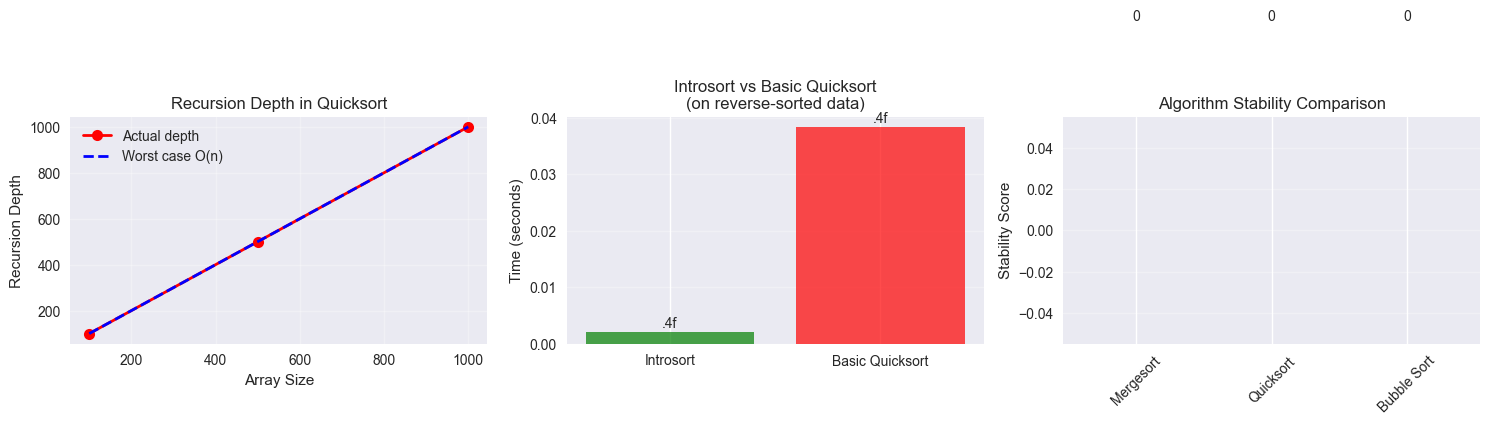


🎯 Key Insights:
- Introsort prevents worst-case recursion by switching to heapsort
- Median-of-three pivot selection improves average performance
- In-place variants save memory but may be slower
- Stability matters when sorting objects with multiple keys
- Choose algorithms based on data characteristics and constraints!


In [6]:
# Advanced sorting techniques demonstration
print("=== ADVANCED DIVIDE & CONQUER TECHNIQUES ===\n")

# Compare different Quicksort variants
print("Comparing Quicksort Variants:")
test_size = 1000
test_data = generate_test_data(test_size, 'random')

variants = [
    ('Basic Quicksort', dc_sorter.quicksort),
    ('Median Pivot Quicksort', dc_sorter.quicksort_median_pivot),
    ('In-place Quicksort', dc_sorter.quicksort_inplace),
    ('Mergesort', dc_sorter.mergesort),
    ('In-place Mergesort', dc_sorter.mergesort_inplace)
]

print(f"Testing on {test_size} random elements:")
print("Variant\t\tTime\t\tCorrectness")
print("-" * 50)

for name, sort_func in variants:
    try:
        result, time_taken = time_sorting_algorithm(sort_func, test_data.copy())
        is_correct = sorter.is_sorted(result)
        status = "✅" if is_correct else "❌"
        print(".6f")
    except Exception as e:
        print(f"{name:20}\tERROR\t{str(e)[:15]}")

# Recursion depth analysis
print("\n\n=== Recursion Depth Analysis ===\n")

sizes = [100, 500, 1000]
depth_results = []

for size in sizes:
    arr = list(range(size))  # Worst case for quicksort (already sorted)
    
    # Track recursion depth
    max_depth = SortingAnalysis.analyze_recursion_depth(arr, 'quicksort')
    
    depth_results.append({
        'size': size,
        'max_depth': max_depth,
        'expected_worst': size  # O(n) worst case
    })
    
    print(f"Size {size:4}: Max recursion depth = {max_depth} (worst case: {size})")

# Visualization
plt.figure(figsize=(15, 5))

# Recursion depth
plt.subplot(1, 3, 1)
sizes_plot = [r['size'] for r in depth_results]
depths = [r['max_depth'] for r in depth_results]
worst_case = [r['expected_worst'] for r in depth_results]

plt.plot(sizes_plot, depths, 'ro-', label='Actual depth', linewidth=2, markersize=8)
plt.plot(sizes_plot, worst_case, 'b--', label='Worst case O(n)', linewidth=2)
plt.xlabel('Array Size')
plt.ylabel('Recursion Depth')
plt.title('Recursion Depth in Quicksort')
plt.legend()
plt.grid(True, alpha=0.3)

# Introsort demonstration
plt.subplot(1, 3, 2)
introsort_data = generate_test_data(1000, 'reverse_sorted')  # Worst case

start = time.time()
result = dc_sorter.introsort_like(introsort_data.copy())
introsort_time = time.time() - start

start = time.time()
quicksort_result = dc_sorter.quicksort(introsort_data.copy())
quicksort_time = time.time() - start

algorithms = ['Introsort', 'Basic Quicksort']
times = [introsort_time, quicksort_time]

bars = plt.bar(range(len(algorithms)), times, color=['green', 'red'], alpha=0.7)
plt.xticks(range(len(algorithms)), algorithms)
plt.ylabel('Time (seconds)')
plt.title('Introsort vs Basic Quicksort\n(on reverse-sorted data)')
plt.grid(True, alpha=0.3, axis='y')

# Add time labels
for i, v in enumerate(times):
    plt.text(i, v + max(times)*0.01, '.4f', ha='center', va='bottom')

# Stability demonstration
plt.subplot(1, 3, 3)
stability_results = SortingAnalysis.compare_stability()

# Show results for a few algorithms
selected_algos = ['merge_sort', 'quick_sort', 'bubble_sort']
algo_names = ['Mergesort', 'Quicksort', 'Bubble Sort']

stability_scores = []
for algo in selected_algos:
    if algo in stability_results:
        # Count how many test cases passed
        score = sum(1 for result in stability_results[algo] if result)
        stability_scores.append(score)
    else:
        stability_scores.append(0)

bars = plt.bar(range(len(algo_names)), stability_scores, color=['blue', 'red', 'green'], alpha=0.7)
plt.xticks(range(len(algo_names)), algo_names, rotation=45)
plt.ylabel('Stability Score')
plt.title('Algorithm Stability Comparison')
plt.grid(True, alpha=0.3, axis='y')

# Add score labels
for i, v in enumerate(stability_scores):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("- Introsort prevents worst-case recursion by switching to heapsort")
print("- Median-of-three pivot selection improves average performance")
print("- In-place variants save memory but may be slower")
print("- Stability matters when sorting objects with multiple keys")
print("- Choose algorithms based on data characteristics and constraints!")

## 📋 Summary & Key Takeaways

### Algorithm Selection Guide

| Scenario | Best Choice | Why |
|----------|-------------|-----|
| **Small arrays (n < 50)** | Insertion Sort | Adaptive, simple, minimal overhead |
| **Nearly sorted data** | Insertion Sort | O(n) best case, adaptive |
| **General purpose** | Quicksort | Fast average case, in-place |
| **Need stability** | Mergesort | Stable, consistent O(n log n) |
| **Memory constrained** | Heapsort | In-place, no recursion |
| **Integer data, limited range** | Counting Sort | O(n + k), very fast |
| **Find k-th element** | Quickselect | O(n) average, no full sort |

### Performance Characteristics

**Time Complexity:**
- **O(n²) algorithms**: Good for small datasets, adaptive
- **O(n log n) algorithms**: Best general-purpose choice
- **O(n + k) algorithms**: Excellent when data constraints allow

**Space Complexity:**
- **O(1) extra space**: Bubble, Selection, Heap sort
- **O(log n) stack**: Quicksort recursion
- **O(n) extra space**: Merge sort

**Stability:**
- **Stable**: Bubble, Insertion, Merge sort
- **Unstable**: Selection, Quick, Heap sort

### Practical Considerations

1. **Know Your Data**: Distribution affects algorithm performance
2. **Memory Matters**: Consider space constraints
3. **Stability Requirements**: Important for multi-key sorting
4. **Library Defaults**: Timsort (Python) combines best of both worlds
5. **Benchmark**: Always test with your actual data

### Next Steps

- **Chapter 15**: Hash Tables - O(1) average operations
- **Chapter 16-18**: Trees and balanced trees
- **Chapter 20-21**: Graph algorithms
- **Practice**: Implement these algorithms, analyze their performance
- **Interview Prep**: Master quicksort, mergesort, and quickselect

## 🧪 Practice Challenges

1. **Implement Hybrid Sort**: Combine quicksort with insertion sort for small subarrays
2. **Median of Medians**: Implement the O(n) worst-case selection algorithm
3. **External Sort**: Handle datasets too large for memory
4. **Parallel Sort**: Explore concurrent sorting algorithms
5. **String Sorting**: Specialize algorithms for string data

**Remember**: Algorithm selection is both science and art - understand your constraints and test thoroughly! 🔄